# Importing required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# Loading the datasets

In [3]:
df_train=pd.read_csv('G:/Food forecasting/train.csv')
df_test=pd.read_csv('G:/Food forecasting/test_QoiMO9B.csv')
df_sub=pd.read_csv('G:/Food forecasting/sample_submission_hSlSoT6.csv')

In [5]:
df_train_meal=pd.read_csv('G:/Food forecasting/meal_info.csv')
df_train_fullfilment=pd.read_csv('G:/Food forecasting/fulfilment_center_info.csv')

In [7]:
df_train_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:
df_train_fullfilment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [23]:
df_train.shape  ,df_test.shape , df_sub.shape

((456548, 9), (32573, 8), (32573, 2))

In [9]:
#we need to merge the the data of meal id and fullfillment id with train and test data

In [24]:
df=df_train.merge(df_train_fullfilment,on='center_id', how='left').merge(df_train_meal, on='meal_id', how='left')

In [25]:
#final train data
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [15]:
#simillarly we will merge for test data

In [26]:
df1=df_test.merge(df_train_fullfilment,on='center_id', how='left').merge(df_train_meal, on='meal_id', how='left')

In [27]:
#final test data
df1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian


#there is no null values to handle missing values

In [30]:
df.isnull().sum()   , df1.isnull().sum()

(id                       0
 week                     0
 center_id                0
 meal_id                  0
 checkout_price           0
 base_price               0
 emailer_for_promotion    0
 homepage_featured        0
 num_orders               0
 city_code                0
 region_code              0
 center_type              0
 op_area                  0
 category                 0
 cuisine                  0
 dtype: int64,
 id                       0
 week                     0
 center_id                0
 meal_id                  0
 checkout_price           0
 base_price               0
 emailer_for_promotion    0
 homepage_featured        0
 city_code                0
 region_code              0
 center_type              0
 op_area                  0
 category                 0
 cuisine                  0
 dtype: int64)

# EDA with respect to train data(df)

In [33]:
#visualization of the data
#from the submission sample file we know that num_orders is the dependent column or traget variable
#so we will do data visualization with respect to num_orders

In [34]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_orders', ylabel='Density'>

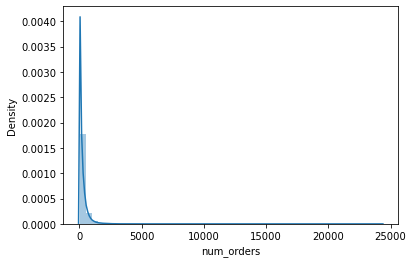

In [42]:
sns.distplot(df['num_orders'])

In [46]:
Week1=df['week'].value_counts()


<AxesSubplot:>

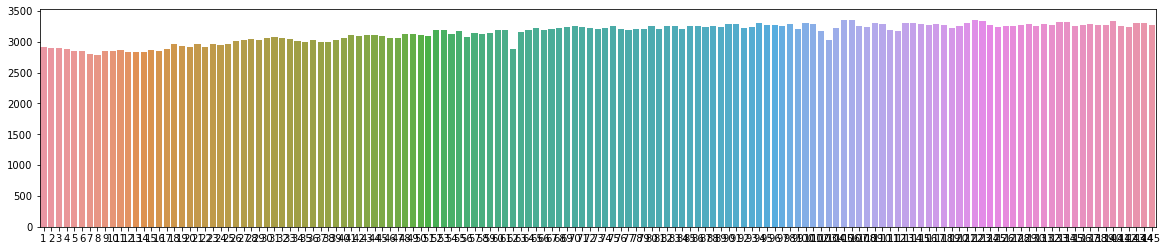

In [51]:
plt.figure(figsize=(20,4))
sns.barplot(x=Week1.index, y=Week1.values)

In [54]:
plt.bar(df['emailer_for_promotion', ylimt=0])

SyntaxError: invalid syntax (Temp/ipykernel_7748/2257924492.py, line 1)

<AxesSubplot:xlabel='emailer_for_promotion'>

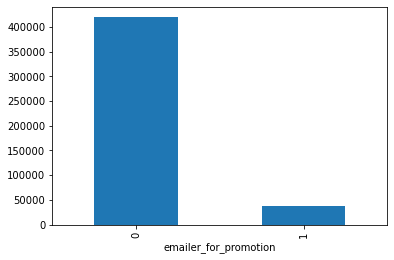

In [55]:
df.groupby('emailer_for_promotion').num_orders.count().plot.bar(ylim=0)

<AxesSubplot:xlabel='center_type'>

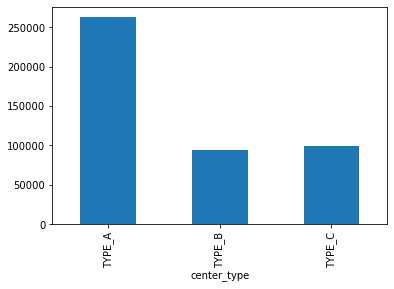

In [64]:
df.groupby('center_type').num_orders.count().plot.bar(ylim=0)

#we can say type a centre order more food

<AxesSubplot:xlabel='category'>

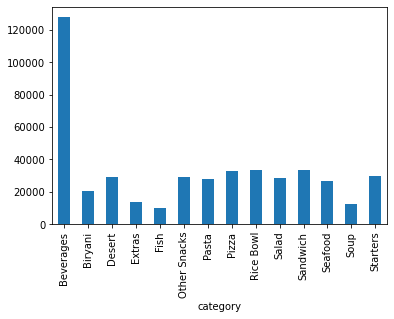

In [65]:
df.groupby('category').num_orders.count().plot.bar(ylim=0)
#beverages are ordered most

<AxesSubplot:xlabel='cuisine'>

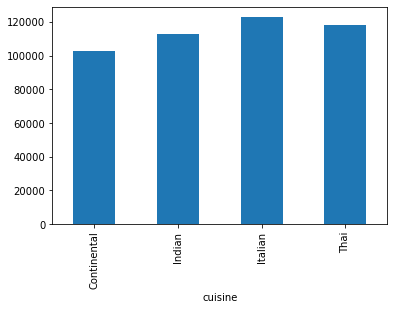

In [66]:
df.groupby('cuisine').num_orders.count().plot.bar()
#all types of foods are more or less ordered 

<AxesSubplot:xlabel='region_code'>

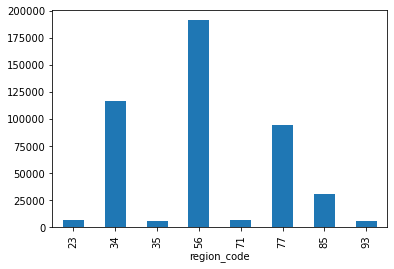

In [67]:

df.groupby('region_code').num_orders.count().plot.bar()
#region code 56 orderd more food

<AxesSubplot:xlabel='city_code'>

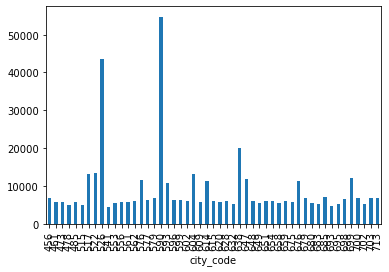

In [62]:

df.groupby('city_code').num_orders.count().plot.bar()

<AxesSubplot:>

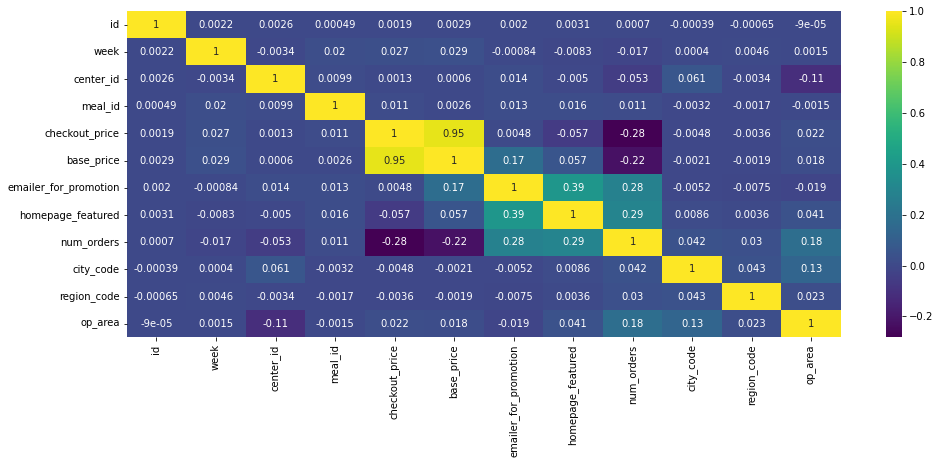

In [74]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, yticklabels=True, cmap='viridis')

In [75]:
#from above heat map or correlation we can say [check out price and baseprice ] are
#highly correlated so we can drop one of the column data

In [76]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [78]:
# we need to convert object into int

In [80]:
df['center_type'].unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

In [82]:
df['cuisine'].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [99]:
df_final=pd.get_dummies(df, columns=['center_type','cuisine','category'])

<AxesSubplot:>

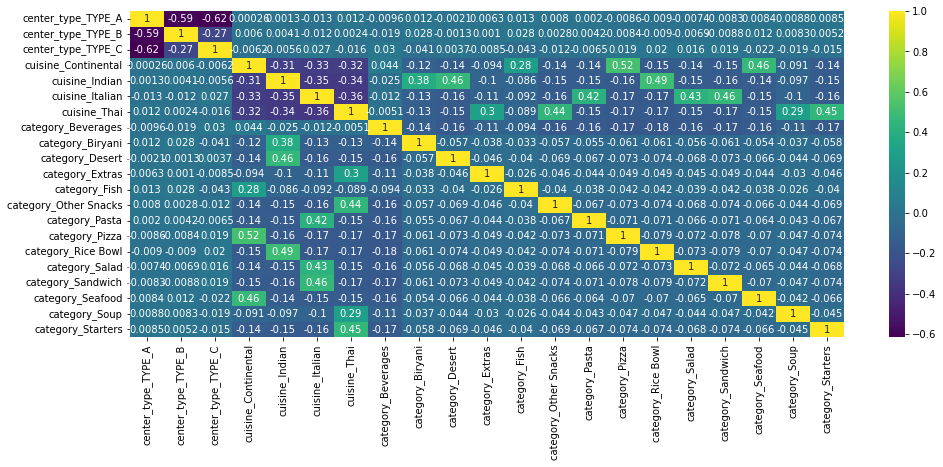

In [97]:
plt.figure(figsize=(16,6))
sns.heatmap(Z.corr(),annot=True, yticklabels=True, cmap='viridis')

In [95]:
#there is no corrlation betwen the any of the data columns to drop

In [100]:
df_final

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [102]:
#now we will drop all the correlated columns 
#since base price and check out price are similar


In [110]:
df_final.drop('id' ,axis=1, inplace=True)

In [122]:
df_final

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,1,55,1885,136.83,0,0,177,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,55,1993,136.83,0,0,270,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,55,2539,134.86,0,0,189,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,55,2139,339.50,0,0,54,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,55,2631,243.50,0,0,40,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,0,0,68,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,145,61,2304,482.09,0,0,42,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,145,61,2664,237.68,0,0,501,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,145,61,2569,243.50,0,0,729,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

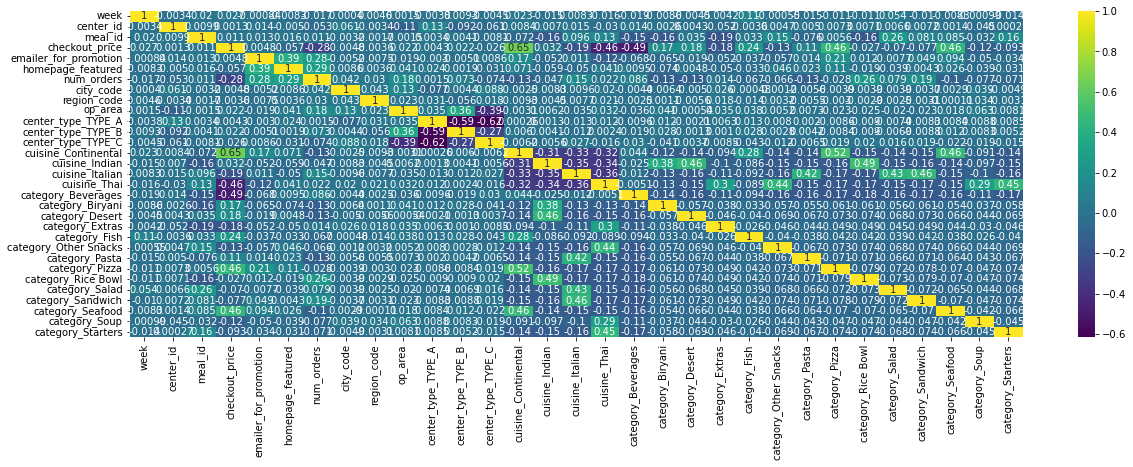

In [112]:
plt.figure(figsize=(20,6))
sns.heatmap(df_final.corr(),annot=True, yticklabels=True, cmap='viridis')

In [114]:
df_final.corr()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
week,1.000000,-0.003450,0.019814,0.026581,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550,-0.003838,0.009282,-0.004497,0.023138,-0.014767,0.008295,-0.015930,-0.018924,-0.008556,-0.004499,-0.004189,0.114410,-0.000548,-0.015443,-0.010517,-0.011077,0.053560,-0.010443,-0.008290,-0.000993,-0.014198
center_id,-0.003450,1.000000,0.009893,0.001348,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869,0.126300,-0.091954,-0.061086,0.008407,0.007037,0.014695,-0.029820,0.014094,-0.002603,0.004251,-0.051970,-0.003596,0.004673,0.004990,0.007297,0.007113,0.006638,0.007239,0.001415,-0.045336,0.000266
meal_id,0.019814,0.009893,1.000000,0.010748,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546,0.003411,0.004090,-0.008088,-0.071787,-0.156288,0.096024,0.125012,-0.149900,-0.156270,0.035378,-0.185007,0.033455,0.154997,-0.075666,0.005602,-0.161994,0.260413,0.080984,0.084958,-0.032146,0.159467
checkout_price,0.026581,0.001348,0.010748,1.000000,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569,0.004250,0.021740,-0.026378,0.647619,0.031917,-0.186959,-0.459606,-0.485268,0.168014,0.180388,-0.181957,0.243738,-0.127074,0.105384,0.460531,-0.027020,-0.069729,-0.077476,0.455558,-0.120754,-0.093482
emailer_for_promotion,-0.000841,0.013658,0.013402,0.004818,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462,-0.003042,-0.005064,0.008600,0.165556,-0.052190,0.011145,-0.117787,-0.067566,-0.064625,-0.018766,-0.051999,-0.037239,-0.056591,0.014166,0.206914,0.011546,-0.007739,0.049495,0.094457,-0.050220,-0.034307
homepage_featured,-0.008263,-0.005043,0.016354,-0.057184,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498,0.024035,0.001877,-0.030601,0.071320,-0.059371,-0.049736,0.040783,0.009499,-0.074107,0.004818,-0.050424,-0.033494,0.045816,0.022972,0.107388,-0.018611,-0.039199,0.004285,0.025724,-0.038733,-0.030740
num_orders,-0.017210,-0.053035,0.010597,-0.282108,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976,0.001535,0.073322,-0.073647,-0.132514,-0.047453,0.149443,0.021724,0.086110,-0.126996,-0.129376,0.014125,-0.067262,-0.065998,-0.130124,-0.027597,0.257584,0.079172,0.189771,-0.101768,-0.076762,-0.071327
city_code,0.000405,0.061078,-0.003198,-0.004805,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476,-0.077339,0.004382,0.088261,-0.002527,-0.008286,-0.009568,0.020253,-0.004420,-0.006409,-0.005043,0.025785,-0.000484,-0.001230,-0.005636,-0.003940,-0.003897,-0.003912,-0.003723,0.002864,0.038829,-0.004885
region_code,0.004600,-0.003426,-0.001662,-0.003648,-0.007462,0.003605,0.029744,0.042686,1.000000,0.023327,0.030834,-0.055865,0.017814,-0.009325,-0.004475,-0.007721,0.021114,-0.002478,0.001080,-0.005579,0.018054,-0.014187,0.003160,-0.005467,-0.003024,-0.002913,-0.002485,-0.003063,-0.000111,0.033747,-0.003075
op_area,0.001550,-0.111869,-0.001546,0.021569,-0.019462,0.041498,0.176976,0.131476,0.023327,1.000000,0.034570,0.358992,-0.392961,-0.003124,0.006206,-0.034673,0.031982,-0.036295,0.041361,-0.000535,0.034732,0.038476,0.005214,0.007301,-0.023329,-0.024731,-0.019908,-0.022847,0.017973,0.062500,0.008052


In [115]:
df_final.describe()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,74.768771,82.105796,2024.337458,332.238933,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590,0.575801,0.206055,0.218144,0.225157,0.246660,0.269249,0.258934,0.280124,0.045152,0.064164,0.029706,0.022313,0.064350,0.060660,0.072584,0.073175,0.062554,0.072919,0.058955,0.027763,0.065581
std,41.524956,45.975046,547.420920,152.939723,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686,0.494221,0.404471,0.412986,0.417686,0.431067,0.443570,0.438050,0.449060,0.207637,0.245045,0.169774,0.147700,0.245376,0.238705,0.259452,0.260424,0.242160,0.260004,0.235542,0.164292,0.247549
min,1.000000,10.000000,1062.000000,2.970000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,43.000000,1558.000000,228.950000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,76.000000,76.000000,1993.000000,296.820000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111.000000,110.000000,2539.000000,445.230000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,145.000000,186.000000,2956.000000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
#similarly we will convert test data  categorical into int

In [117]:
df1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian


In [118]:
df1=pd.get_dummies(df1, columns=['center_type','cuisine','category'])

In [120]:
df1.drop(['base_price','id'], axis=1, inplace=True)

In [121]:
df1

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,146,55,1885,158.11,0,0,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,146,55,1993,160.11,0,0,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,146,55,2539,157.14,0,0,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,146,55,2631,162.02,0,0,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,146,55,1248,163.93,0,0,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,155,61,1543,482.09,0,0,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
32569,155,61,2304,483.09,0,0,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
32570,155,61,2664,322.07,0,0,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32571,155,61,2569,322.07,0,0,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [123]:
#now we need to define dependent and independent values for split the data

In [124]:
df_final.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,1,55,1885,136.83,0,0,177,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,55,1993,136.83,0,0,270,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,55,2539,134.86,0,0,189,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,55,2139,339.50,0,0,54,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,55,2631,243.50,0,0,40,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [150]:
#we preprocess the data to min max

In [182]:
 #from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [183]:
#scaler.fit(df_final)

MinMaxScaler()

In [184]:
#dff=scaler.transform(df_final)

In [287]:
#dff

In [186]:
#dff=pd.DataFrame(dff,index=df_final.index, columns=df_final.columns)

In [155]:
df_final

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,1,55,1885,136.83,0,0,177,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,55,1993,136.83,0,0,270,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,55,2539,134.86,0,0,189,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,55,2139,339.50,0,0,54,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,55,2631,243.50,0,0,40,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,0,0,68,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,145,61,2304,482.09,0,0,42,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,145,61,2664,237.68,0,0,501,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,145,61,2569,243.50,0,0,729,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [288]:
X=df_final.drop('num_orders', axis=1)
y=df_final['num_orders']

In [289]:
X

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,1,55,1885,136.83,0,0,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,55,1993,136.83,0,0,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,55,2539,134.86,0,0,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,55,2139,339.50,0,0,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,55,2631,243.50,0,0,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,0,0,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,145,61,2304,482.09,0,0,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,145,61,2664,237.68,0,0,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,145,61,2569,243.50,0,0,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [290]:
 y_train.shape , y_test.shape

((342411,), (114137,))

In [291]:
X.shape, y.shape

((456548, 30), (456548,))

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

In [293]:
X_train.shape, X_test.shape

((342411, 30), (114137, 30))

In [192]:
#from looking at the y data we can say its a regression problem , will apply some of the regression ML algorithm

# Linear regression model

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [295]:
model=LinearRegression()

In [296]:
model

LinearRegression()

In [297]:
model.fit(X_train, y_train)

LinearRegression()

In [298]:
y_pred=abs(model.predict(X_test))
y_pred_train=abs(model.predict(X_train))

In [299]:
y_pred_train

array([596.818798  , 676.16841992,  56.97777181, ..., 225.35132704,
        83.05190736,  26.37176499])

In [300]:
y_pred

array([751.64620948, 128.33907351,  57.71225606, ..., 593.02986563,
        21.49713347,  84.60389542])

In [301]:
# Root Mean Squared Error on training and test dataset
rmse_train = mean_squared_error(y_train, y_pred_train)**.5
rmse_test = mean_squared_error(y_test, y_pred)**.5

In [302]:
rmse_train

300.02596632918807

In [303]:
rmse_test

307.31111986261806

In [304]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [305]:
rmsle_train =mean_squared_log_error(y_train, y_pred_train)
rmsle_test = mean_squared_log_error(y_test, y_pred)

In [306]:
rmsle_train

1.0269151370416933

In [307]:
rmsle_test

1.03518858740783

# 2)RandomForestRegressor


In [308]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

In [309]:
regr

RandomForestRegressor()

In [310]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [311]:
y_pred=abs(model.predict(X_test))
y_pred_train=abs(model.predict(X_train))

In [312]:
rmsle_train = mean_squared_log_error(y_train, y_pred_train)*100
rmsle_test = mean_squared_log_error(y_test, y_pred)*100

In [313]:
rmsle_train

102.69151370416934

In [314]:
rmsle_test

103.51885874078299

In [315]:
# now we will try to predict the data from df1 or test data

In [316]:
df1

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,146,55,1885,158.11,0,0,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,146,55,1993,160.11,0,0,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,146,55,2539,157.14,0,0,647,56,2.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,146,55,2631,162.02,0,0,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,146,55,1248,163.93,0,0,647,56,2.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,155,61,1543,482.09,0,0,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
32569,155,61,2304,483.09,0,0,473,77,4.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
32570,155,61,2664,322.07,0,0,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32571,155,61,2569,322.07,0,0,473,77,4.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [317]:
df_sub.head()

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


In [318]:
ypred3=regr.predict(df1)

In [319]:
ypred3

array([104.48,  68.85, 140.01, ..., 358.5 , 375.75, 171.28])

In [320]:
df2=pd.DataFrame(ypred3, columns=['num_orders'])

In [321]:
df2

,num_orders
0,104.48
1,68.85
2,140.01
3,80.47
4,66.36
...,...
32568,97.27
32569,27.54
32570,358.50
32571,375.75


In [324]:
df_sub['num_orders']=df2['num_orders']

In [325]:
df_sub

,id,num_orders
0,1028232,104.48
1,1127204,68.85
2,1212707,140.01
3,1082698,80.47
4,1400926,66.36
...,...,...
32568,1250239,97.27
32569,1039516,27.54
32570,1158107,358.50
32571,1444235,375.75


In [326]:
df_sub.to_csv('G:/Food forecasting/submission.csv',index=False)